In [1]:
%matplotlib inline
import os
import glob
import pickle
from context import curlovision as cvis
import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
from matplotlib.collections import PatchCollection
import numpy as np
import math

In [2]:
# Loop over and load all processed MatchResults
results = glob.glob('../data/MatchResults/*.pkl')
match_results = []
for filename in results:
    print('Processing MatchResult: {}'.format(filename))
    with open(filename, 'rb') as f:
        match_results.append(pickle.load(f))        

Processing MatchResult: ../data/MatchResults/PyeongChang.Olympics.2018.curling.women's.semi-finals.Korea.v.Japan.1080p.NBC.WEB-DL-FINFUNGUS.mp4.pkl
Processing MatchResult: ../data/MatchResults/PyeongChang.Olympics.2018.curling.mixed.doubles.round-robin.tiebreaker.1080p.NBC.WEB-DL-FINFUNGUS.mp4.pkl
Processing MatchResult: ../data/MatchResults/PyeongChang.Olympics.2018.curling.women's.round-robin.Russia.v.Canada.1080p.NBC.WEB-DL-FINFUNGUS.mp4.pkl
Processing MatchResult: ../data/MatchResults/PyeongChang.Olympics.2018.curling.women's.round-robin.Japan.v.Sweden.1080p.NBC.WEB-DL-FINFUNGUS.mp4.pkl
Processing MatchResult: ../data/MatchResults/PyeongChang.Olympics.2018.curling.women's.round-robin.USA.v.Canada.1080p.NBC.WEB-DL-FINFUNGUS.mp4.pkl
Processing MatchResult: ../data/MatchResults/PyeongChang.Olympics.2018.curling.mixed.doubles.semifinal.1.1080p.NBC.WEB-DL-FINFUNGUS.mp4.pkl
Processing MatchResult: ../data/MatchResults/PyeongChang.Olympics.2018.curling.men's.round-robin.Sweden.v.USA.1080p

In [12]:
# Example of drilling down into the results:
match_results[1].end_results[3].stone_layouts[0].stones[0].color

'red'

In [13]:
# Loop over all stones in all matches and extract x/y positions, 
#  color, thrown-by-hammer-team, and stone order within end.
def extract_stone_info(match_results):
    xs,ys,cs,hs,ns = [],[],[],[],[]
    for mr in match_results:
        for er in mr.end_results:
            hammer_color = 'red' if er.red_hammer else 'yellow'
            for layout,stones_left in zip(er.stone_layouts,er.stones_left):
                stones_thrown = (16 - stones_left[0] - stones_left[1])
                for stone in layout.stones:
                    xs.append(stone.x)
                    ys.append(stone.y)
                    cs.append(stone.color)
                    hs.append(True if stone.color==hammer_color else False) # Rock thrown by team with hammer?
                    ns.append(stones_thrown)
    return xs,ys,cs,hs,ns

xs,ys,cs,hs,ns = extract_stone_info(match_results)
len(xs)

10088

In [14]:
# Make into np array and check for outliers
xs = np.array(xs)
ys = np.array(ys)
print( len(xs) )
print( len(xs[(xs>-7) & (xs<7)]))

10088
10080


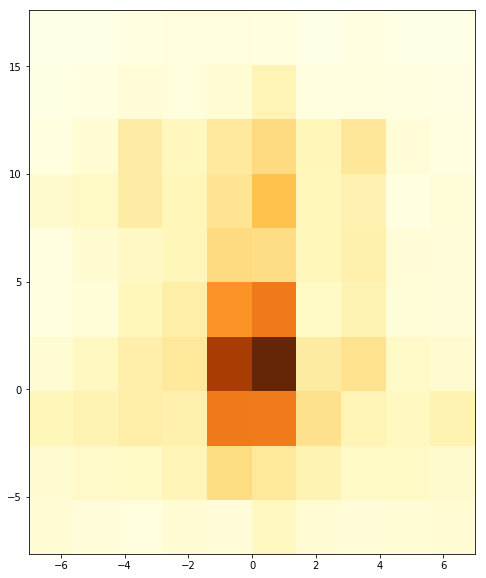

In [15]:
# Very basic binned 2d histogram of the stone positions in feet in house-centered coordinates:
plt.figure(figsize=(8,10))
plt.hist2d(xs[(xs>-8) & (xs<8)],ys[(xs>-8) & (xs<8)],cmap='YlOrBr')
plt.show()

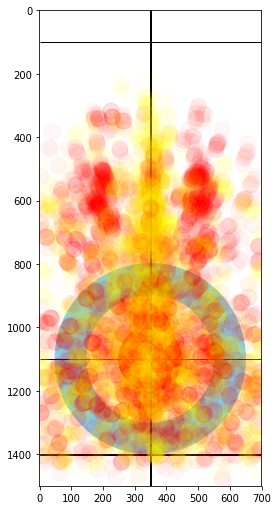

In [16]:
# Draw the house, set the height in pixels and everything scales to that.  Height represents 30 ft in real world.
# Returns patches list and the feet-to-pixel conversion factor, and pixel coordinate for the house center.
h = 1500
patches,ft2px,xc,yc = cvis.draw_house(height=h)

# Draw Stones in some creative way, appending to list of patches
for x,y,c,hammer,n in zip(xs,ys,cs,hs,ns):
    #print(stone)
    #c=[1,0,0] if c=='red' else [1,1,0]  # Red or Yellow based on stone color
    #c=[0,1,0] if n<=4 else [0,0,1]  # Blue or Green based on lead stones vs the rest
    c=[1,0,0] if hammer else [1,1,0]  # Red or Yellow based on if team has hammer this end
    alpha = 0.03
    #alpha = 0.12 if n<=4 else 0.03  # Make lead stones heftier
    #if n > 4: continue # Only show first 4 stones
    #patches.append(Circle((xc+x*ft2px, yc-y*ft2px), 0.5*ft2px ,color=[pow(n/16.,2),pow(1-n/16.,2),0],alpha=alpha))
    patches.append(Circle((xc+x*ft2px, yc-y*ft2px), 0.5*ft2px ,color=c,alpha=alpha))

# Display everything
w=int(h*14./30.)
fig = plt.figure(figsize=(h/80.,w/80.))
img = np.ones((h,w,3),dtype=float)
plt.imshow(img)
for patch in patches:
    fig.gca().add_patch(patch)
plt.show()